In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

encoder = Sequential([
                      Flatten(input_shape=(28,28)),
                      Dense(128, activation='relu'),
                      Dense(16, activation='relu'),
                      Dense(2, activation='relu')
])

decoder = Sequential([
                      Dense(16, activation='relu', input_dim = 2),
                      Dense(128, activation='relu'),
                      Dense(784, activation='relu'),
                      Reshape((28, 28))
])

model = Sequential([encoder, decoder])

encoder.summary()
decoder.summary()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 102,578
Trainable params: 102,578
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)            

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=["accuracy"])

In [ ]:
model.fit(x_train, x_train, epochs=30, batch_size=32, validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0666 - accuracy: 0.2897 - val_loss: 0.0563 - val_accuracy: 0.3300
Epoch 2/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0544 - accuracy: 0.3492 - val_loss: 0.0525 - val_accuracy: 0.3509
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0518 - accuracy: 0.3704 - val_loss: 0.0510 - val_accuracy: 0.3727
Epoch 4/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0499 - accuracy: 0.3830 - val_loss: 0.0496 - val_accuracy: 0.3853
Epoch 5/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0486 - accuracy: 0.3936 - val_loss: 0.0484 - val_accuracy: 0.3940
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0473 - accuracy: 0.4001 - val_loss: 0.0468 - val_accuracy: 0.3997
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0466 - accuracy: 0.4022 - val_loss: 0.0462 - val_acc

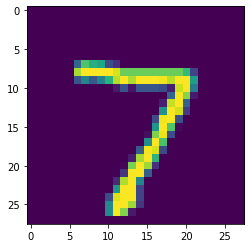

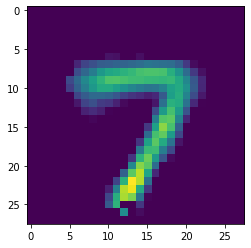

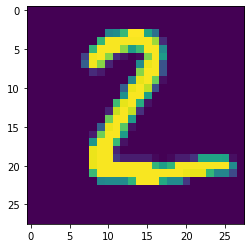

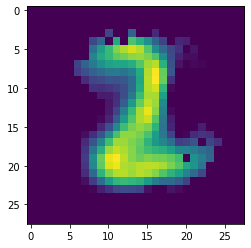

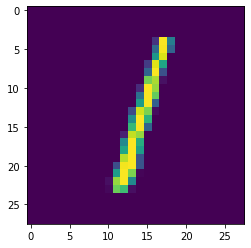

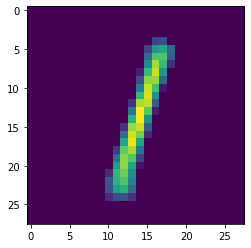

In [6]:
test_imgs = model.predict(x_test[:3])

import matplotlib.pyplot as plt
for i, img in enumerate(test_imgs):
  plt.figure()
  plt.imshow(x_test[i])
  plt.show()
  plt.imshow(img)
  plt.show()




In [7]:
import numpy as np
encoded_img = encoder.predict(np.expand_dims(x_test[0], axis=0))

print(encoded_img)

[[ 9.548852 15.993979]]


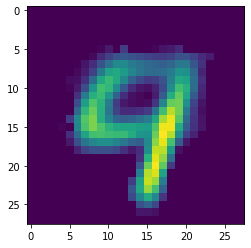

In [18]:
encoded_img = [[5.2, 7.2]]
decoded_img = decoder.predict(encoded_img)

plt.figure()
plt.imshow(decoded_img[0])
plt.show()